<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN Practice

---

You're now familiar with how DBSCAN works. Let's practice it in sklearn.

In [4]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import cluster
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist, squareform

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Fit DBSCAN on a generated dataset


We will start with a simple generated dataset. 

Import the `make_circles` function from `sklearn.datasets`. You can use this to generate some clusters that will perform well with DBSCAN.

Create some `X` and `y` using the function. Here is some sample code:
```python
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
```

### 1. Plot the generated circles data

In [5]:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

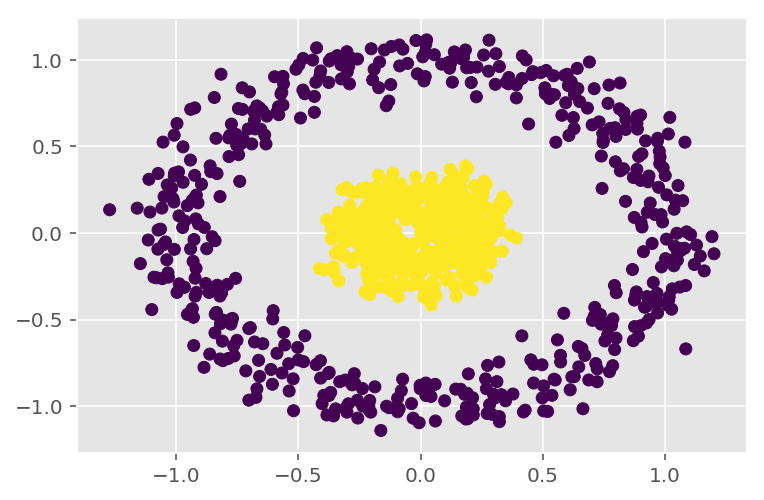

In [6]:
plt.scatter(circles_X[:,0],circles_X[:,1],c=circles_y)

### 2. Rescale the data

In [7]:
scaler = StandardScaler()
circles_Xs = scaler.fit_transform(circles_X)

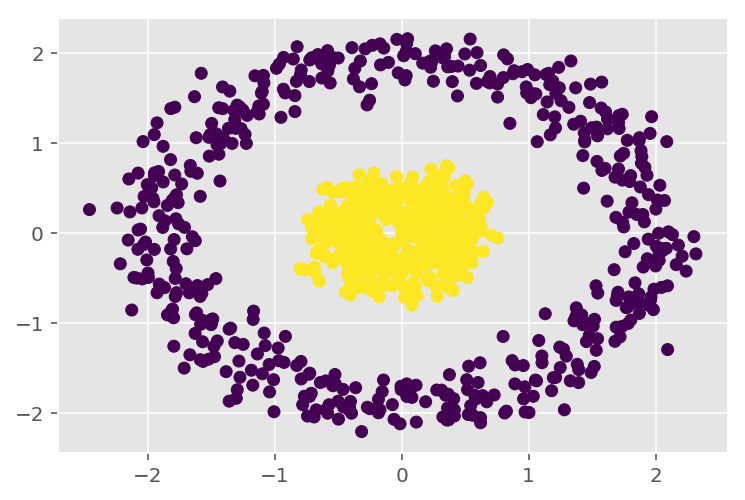

In [8]:
plt.scatter(circles_Xs[:,0],circles_Xs[:,1],c=circles_y)

### 3. Fit DBSCAN on the rescaled data

In [9]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(circles_Xs)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

### 4. Extract the cluster labels.

In [10]:
print('Labels:')
print(dbscan.labels_)

Labels:
[0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0
 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0
 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0
 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1
 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1
 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1
 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0
 1 1 1 0 1 0 1 0 

### 5. How many clusters do you get?

In [11]:
print(np.unique(dbscan.labels_))

[0 1]


### 6. Evaluate DBSCAN

- Visually
- With silhouette score
- Using the true `y`, with homogeneity, completeness and V-measure score

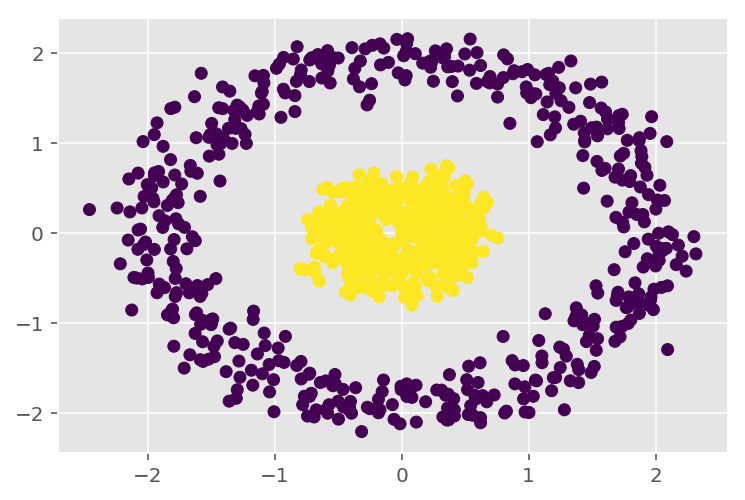

In [12]:
plt.scatter(circles_Xs[:,0],circles_Xs[:,1],c=dbscan.labels_)

Silhouette score: 0.23783520183694895


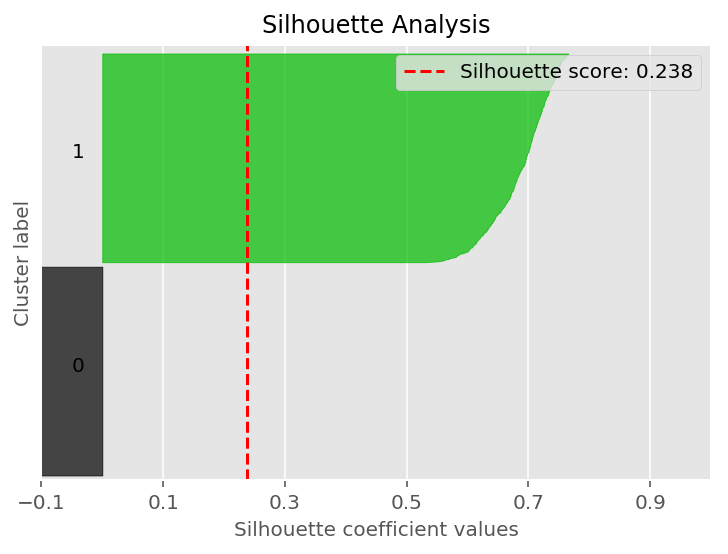

In [13]:
from sklearn.metrics import silhouette_score
from scikitplot.metrics import plot_silhouette
print('Silhouette score:', silhouette_score(circles_Xs, dbscan.labels_))
plot_silhouette(circles_Xs, dbscan.labels_);

In [14]:
from sklearn.metrics import homogeneity_completeness_v_measure
homogeneity_completeness_v_measure(circles_y, dbscan.labels_)

(1.0, 1.0, 1.0)

### 7.  Extract the core samples. 

How many do you have?

In [15]:
len(dbscan.core_sample_indices_)

1000

### 8. Create a scatter plot of the data with coloring according to the cluster labels

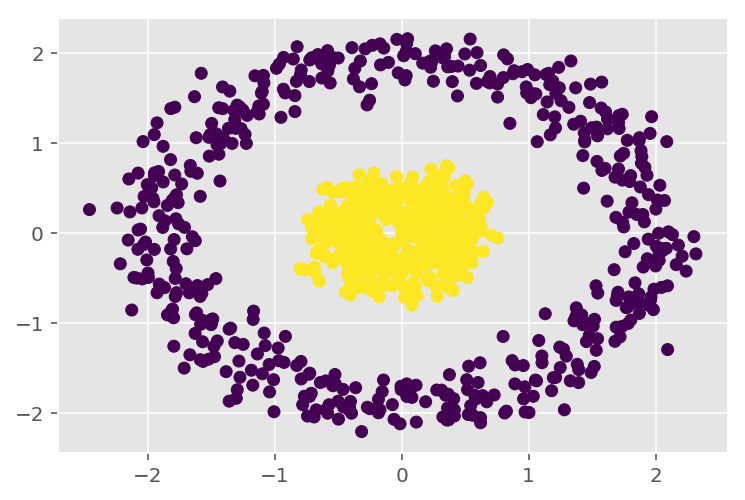

In [16]:
plt.scatter(circles_Xs[:,0],circles_Xs[:,1],c=dbscan.labels_);

## Bonus:

### Try k-means and hierarchical clustering. Which differences do you observe? Which algorithm do you find most suitable in each case? 

In [17]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [18]:
kmeans = KMeans(n_clusters=2)

clusters = kmeans.fit(circles_Xs)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

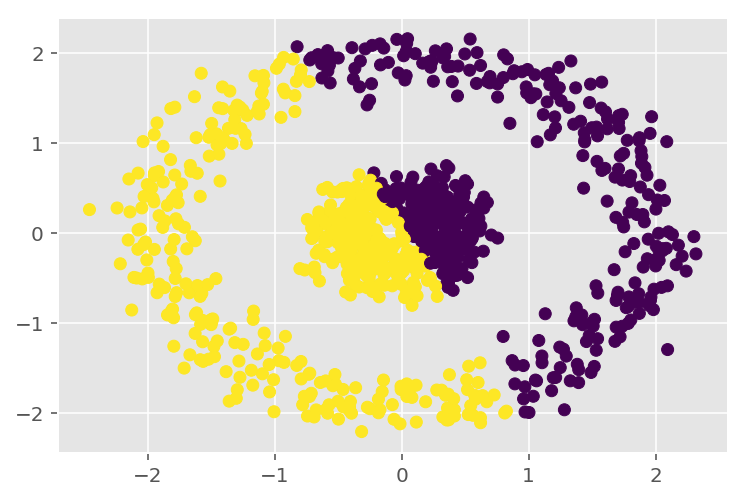

In [19]:
plt.scatter(circles_Xs[:,0],circles_Xs[:,1],c=kmeans.labels_);

In [22]:
aggcluster = AgglomerativeClustering(linkage='single')
aggcluster.fit(circles_Xs)
labels = aggcluster.labels_

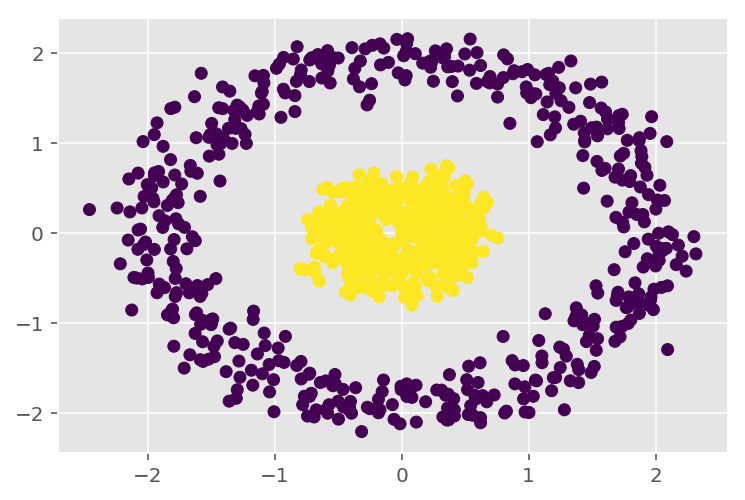

In [23]:
plt.scatter(circles_Xs[:,0],circles_Xs[:,1],c=aggcluster.labels_);